ref: https://github.com/google-ai-edge/mediapipe

ref: https://github.com/Asadullah-Dal17/Eyes-Position-Estimator-Mediapipe

In [1]:
import cv2
import numpy as np
from math import sqrt
import mediapipe as mp
import matplotlib.pyplot as plt

2024-10-29 12:34:07.016209: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-29 12:34:07.016271: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-29 12:34:07.054783: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-29 12:34:07.162459: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-29 12:34:08.559520: W tensorflow/compiler/tf2

In [2]:
output_folder = "/home/vshah/Documents/Uni/Thesis_Cluster/pupil-size-estimation-with-super-resolution/local/detections/mediapipe"

In [3]:
IMAGE_FILE = "/home/vshah/Documents/Uni/Thesis_Cluster/pupil-size-estimation-with-super-resolution/local/data/EyeDentify/Wo_SR/original/6/2/frame_01.png"

# IMAGE_FILE = "/home/vshah/Documents/Uni/Thesis_Cluster/pupil-size-estimation-with-super-resolution/local/data/EyeDentify/W_SR/GFPGAN_x2/full_imgs/4/1/frame_01.png.png"

In [4]:
DEPTH_MAP_IMAGE_FILE = "/home/vshah/Documents/Uni/Thesis_Cluster/pupil-size-estimation-with-super-resolution/local/publications/imgs/depth_image.png"

In [5]:
frame = cv2.imread(IMAGE_FILE)
rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

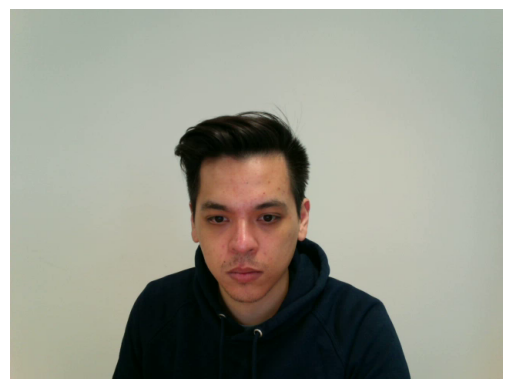

In [6]:
plt.imshow(rgb_frame)
plt.axis('off')
plt.show()

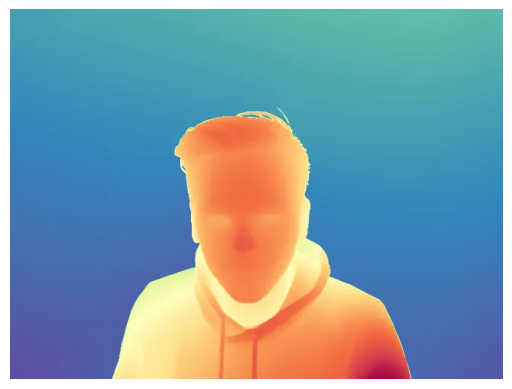

In [7]:
depth_frame = cv2.imread(DEPTH_MAP_IMAGE_FILE)
depth_rgb_frame = cv2.cvtColor(depth_frame, cv2.COLOR_BGR2RGB)
plt.imshow(depth_rgb_frame)
plt.axis('off')
plt.show()

In [8]:
def crop_and_save_face(results, image):
    if not results.detections:
        print("No face detected")
        return

    for detection in results.detections:
        bboxC = detection.location_data.relative_bounding_box
        ih, iw, _ = image.shape
        x, y, w, h = int(bboxC.xmin * iw), int(bboxC.ymin * ih), int(bboxC.width * iw), int(bboxC.height * ih)

        # Desired size of the cropped image
        crop_size = 256

        # Calculate the center of the detected face
        center_x, center_y = x + w // 2, y + h // 2

        # Calculate the cropping box coordinates
        x1 = max(center_x - crop_size // 2, 0)
        y1 = max(center_y - crop_size // 2, 0)
        x2 = x1 + crop_size
        y2 = y1 + crop_size

        # Ensure the cropping box is within the image boundaries
        if x2 > iw:
            x1 = iw - crop_size
            x2 = iw
        if y2 > ih:
            y1 = ih - crop_size
            y2 = ih

        # Crop the face
        cropped_face = image[y1:y2, x1:x2]

        # If the cropped area is smaller than 256x256 due to image boundaries, pad the image
        if cropped_face.shape[0] < crop_size or cropped_face.shape[1] < crop_size:
            cropped_face = cv2.copyMakeBorder(
                cropped_face,
                top=0,
                bottom=max(0, crop_size - cropped_face.shape[0]),
                left=0,
                right=max(0, crop_size - cropped_face.shape[1]),
                borderType=cv2.BORDER_CONSTANT,
                value=[0, 0, 0]  # You can change the padding color if needed
            )

        print("cropped_face = ", cropped_face.shape)
        return cropped_face

cropped_face =  (256, 256, 3)
(256, 256, 3)


I0000 00:00:1730201844.774963   16825 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1730201844.776789   17165 gl_context.cc:357] GL version: 3.2 (OpenGL ES 3.2 Mesa 23.2.1-1ubuntu3.1~22.04.2), renderer: Mesa Intel(R) UHD Graphics (CML GT2)
INFO: Created TensorFlow Lite XNNPACK delegate for CPU.
W0000 00:00:1730201844.807166   17148 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
/home/vshah/.local/lib/python3.10/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


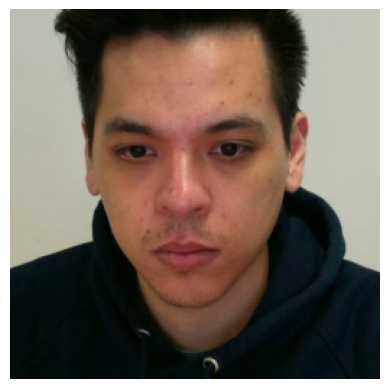

In [9]:
mp_face_detection = mp.solutions.face_detection
face_detection = mp_face_detection.FaceDetection(model_selection=0, min_detection_confidence=0.5)
tmp_frame = frame.copy()
results = face_detection.process(tmp_frame)
if not results.detections:
    print("No face detected")
else:
    cropped_face = crop_and_save_face(results, frame)
    cropped_face_rgb = cv2.cvtColor(cropped_face, cv2.COLOR_BGR2RGB)
    print(cropped_face_rgb.shape)
    plt.imshow(cropped_face_rgb)
    plt.axis('off')
    plt.show()

In [8]:
# cropped_face = cv2.resize(cropped_face, (512, 512), interpolation=cv2.INTER_CUBIC) # bicubic upsampling
# cropped_face_rgb = cv2.resize(cropped_face_rgb, (512, 512), interpolation=cv2.INTER_CUBIC) # bicubic upsampling
# plt.imshow(cropped_face_rgb)
# plt.axis('off')
# plt.show()

In [12]:
import os
os.makedirs(output_folder, exist_ok=True)

In [13]:
cv2.imwrite(f"{output_folder}/cropped_face_image.png", cropped_face)

True

I0000 00:00:1730201929.336151   16825 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1730201929.337156   17383 gl_context.cc:357] GL version: 3.2 (OpenGL ES 3.2 Mesa 23.2.1-1ubuntu3.1~22.04.2), renderer: Mesa Intel(R) UHD Graphics (CML GT2)
W0000 00:00:1730201929.522516   17376 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
/home/vshah/.local/lib/python3.10/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


cropped_face =  (256, 256, 3)
(256, 256, 3)


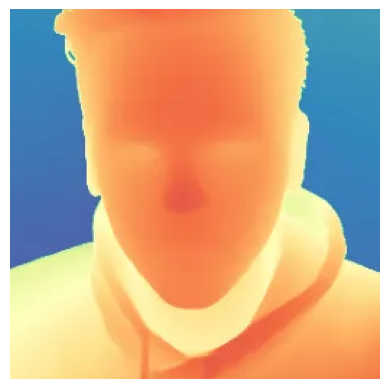

In [14]:
mp_face_detection = mp.solutions.face_detection
face_detection = mp_face_detection.FaceDetection(model_selection=0, min_detection_confidence=0.5)
tmp_depth_frame = depth_frame.copy()
results_depth = face_detection.process(tmp_depth_frame)
if not results_depth.detections:
    print("No face detected")
else:
    cropped_face_depth = crop_and_save_face(results, depth_frame)
    cropped_face_depth_rgb = cv2.cvtColor(cropped_face_depth, cv2.COLOR_BGR2RGB)
    print(cropped_face_depth_rgb.shape)
    plt.imshow(cropped_face_depth_rgb)
    plt.axis('off')
    plt.show()

In [15]:
cv2.imwrite(f"{output_folder}/cropped_face_depth_image.png", cropped_face_depth)

True

In [16]:
mediapipe_face_mesh = mp.solutions.face_mesh
face_mesh = mediapipe_face_mesh.FaceMesh(
    max_num_faces=1,
    static_image_mode=True,
    refine_landmarks=True,
    min_detection_confidence=0.5,
    min_tracking_confidence=0.5
)

I0000 00:00:1730201965.631248   16825 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1730201965.632724   17460 gl_context.cc:357] GL version: 3.2 (OpenGL ES 3.2 Mesa 23.2.1-1ubuntu3.1~22.04.2), renderer: Mesa Intel(R) UHD Graphics (CML GT2)


W0000 00:00:1730201965.758714   17448 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1730201965.773730   17454 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


In [17]:
[e for e in mp_face_detection.FaceKeyPoint]

[<FaceKeyPoint.RIGHT_EYE: 0>,
 <FaceKeyPoint.LEFT_EYE: 1>,
 <FaceKeyPoint.NOSE_TIP: 2>,
 <FaceKeyPoint.MOUTH_CENTER: 3>,
 <FaceKeyPoint.RIGHT_EAR_TRAGION: 4>,
 <FaceKeyPoint.LEFT_EAR_TRAGION: 5>]

In [18]:
def anonymize_face_simple(image, factor=10.0):
	# automatically determine the size of the blurring kernel based
	# on the spatial dimensions of the input image
	(h, w) = image.shape[:2]
	kW = int(w / factor)
	kH = int(h / factor)
	# ensure the width of the kernel is odd
	if kW % 2 == 0:
		kW -= 1
	# ensure the height of the kernel is odd
	if kH % 2 == 0:
		kH -= 1
	# apply a Gaussian blur to the input image using our computed
	# kernel size
	return cv2.GaussianBlur(image, (kW, kH), 0)

In [19]:
def anonymize_face_pixelate(image, blocks=60):
	# divide the input image into NxN blocks
	(h, w) = image.shape[:2]
	xSteps = np.linspace(0, w, blocks + 1, dtype="int")
	ySteps = np.linspace(0, h, blocks + 1, dtype="int")
	# loop over the blocks in both the x and y direction
	for i in range(1, len(ySteps)):
		for j in range(1, len(xSteps)):
			# compute the starting and ending (x, y)-coordinates
			# for the current block
			startX = xSteps[j - 1]
			startY = ySteps[i - 1]
			endX = xSteps[j]
			endY = ySteps[i]
			# extract the ROI using NumPy array slicing, compute the
			# mean of the ROI, and then draw a rectangle with the
			# mean RGB values over the ROI in the original image
			roi = image[startY:endY, startX:endX]
			(B, G, R) = [int(x) for x in cv2.mean(roi)[:3]]
			cv2.rectangle(image, (startX, startY), (endX, endY),
				(B, G, R), -1)
	# return the pixelated blurred image
	return image

In [30]:
def landmarksDetection(image, depth_image, results, draw=False):
    image_height, image_width = image.shape[:2]
    mesh_coordinates = [
        (int(point.x * image_width), int(point.y * image_height))
        for point in results.multi_face_landmarks[0].landmark
    ]
    if draw:
        img = image.copy()
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        [cv2.circle(img, i, 2, (0, 255, 0), -1) for i in mesh_coordinates]
        cv2.imwrite(f"{output_folder}/face_with_landmarks_original.png", img)

        d_img = depth_image.copy()
        d_img = cv2.cvtColor(d_img, cv2.COLOR_BGR2RGB)
        [cv2.circle(d_img, i, 2, (0, 255, 0), -1) for i in mesh_coordinates]
        cv2.imwrite(f"{output_folder}/depth_face_with_landmarks_original.png", d_img)

        img1 = anonymize_face_pixelate(img)
        img2 = anonymize_face_simple(img, 7)
        [cv2.circle(img1, i, 2, (0, 255, 0), -1) for i in mesh_coordinates]
        [cv2.circle(img2, i, 2, (0, 255, 0), -1) for i in mesh_coordinates]
        cv2.imwrite(f"{output_folder}/face_with_landmarks_1.png", img1)
        cv2.imwrite(f"{output_folder}/face_with_landmarks_2.png", img2)
    return mesh_coordinates

In [21]:
rgb_frame_anonymized = anonymize_face_simple(cv2.cvtColor(rgb_frame, cv2.COLOR_BGR2RGB))
cv2.imwrite(f"{output_folder}/rgb_frame_anonymized.png", rgb_frame_anonymized)

True

In [22]:
cropped_face_anonymized = anonymize_face_simple(cv2.cvtColor(cropped_face_rgb, cv2.COLOR_BGR2RGB), 7)
cv2.imwrite(f"{output_folder}/cropped_face_anonymized.png", cropped_face_anonymized)

True

In [23]:
# Euclaidean distance to calculate the distance between the two points
def euclaideanDistance(point, point1):
    x, y = point
    x1, y1 = point1
    distance = sqrt((x1 - x) ** 2 + (y1 - y) ** 2)
    return distance

In [24]:
# Blinking Ratio
def blinkRatio(image, landmarks, right_indices, left_indices):

    right_eye_landmark1 = landmarks[right_indices[0]]
    right_eye_landmark2 = landmarks[right_indices[8]]

    right_eye_landmark3 = landmarks[right_indices[12]]
    right_eye_landmark4 = landmarks[right_indices[4]]

    left_eye_landmark1 = landmarks[left_indices[0]]
    left_eye_landmark2 = landmarks[left_indices[8]]

    left_eye_landmark3 = landmarks[left_indices[12]]
    left_eye_landmark4 = landmarks[left_indices[4]]

    right_eye_horizontal_distance = euclaideanDistance(
        right_eye_landmark1, right_eye_landmark2
    )
    right_eye_vertical_distance = euclaideanDistance(
        right_eye_landmark3, right_eye_landmark4
    )

    left_eye_vertical_distance = euclaideanDistance(
        left_eye_landmark3, left_eye_landmark4
    )
    left_eye_horizobtal_distance = euclaideanDistance(
        left_eye_landmark1, left_eye_landmark2
    )

    right_eye_ratio = right_eye_horizontal_distance / right_eye_vertical_distance
    left_eye_ratio = left_eye_horizobtal_distance / left_eye_vertical_distance

    eyes_ratio = (right_eye_ratio + left_eye_ratio) / 2

    return eyes_ratio

In [25]:
RIGHT_EYE = [
    362, 382, 381, 380, 374, 373, 390, 249, 263, 466, 388, 387, 386, 385, 384, 398
]
LEFT_EYE = [
    33, 7, 163, 144, 145, 153, 154, 155, 133, 173, 157, 158, 159, 160, 161, 246
]

In [31]:
results = face_mesh.process(cropped_face_rgb)
mesh_coordinates = landmarksDetection(cropped_face_rgb, cropped_face_depth_rgb, results, True)
eyes_ratio = blinkRatio(cropped_face_rgb, mesh_coordinates, RIGHT_EYE, LEFT_EYE)
print("eyes_ratio = ",eyes_ratio)
if eyes_ratio > 3.5:
    print("Person Blinked")
else:
    print("Person Didn't Blinked")

/home/vshah/.local/lib/python3.10/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


eyes_ratio =  2.6498995614202534
Person Didn't Blinked


In [40]:
def extract_eyes_regions(image, landmarks, eye_indices, image_depth=None):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    h, w, _ = image.shape
    points = [(int(landmarks[idx].x * w), int(landmarks[idx].y * h)) for idx in eye_indices]

    x_min = min([p[0] for p in points])
    x_max = max([p[0] for p in points])
    y_min = min([p[1] for p in points])
    y_max = max([p[1] for p in points])

    center_x = (x_min + x_max) // 2
    center_y = (y_min + y_max) // 2
    
    upscale = 1
    target_width = 32 * upscale
    target_height = 16 * upscale

    x1 = max(center_x - target_width // 2, 0)
    y1 = max(center_y - target_height // 2, 0)
    x2 = x1 + target_width
    y2 = y1 + target_height

    if x2 > w:
        x1 = w - target_width
        x2 = w
    if y2 > h:
        y1 = h - target_height
        y2 = h

    eye = image[y1:y2, x1:x2]
    eye_depth = None
    if image_depth is not None:
        image_depth = cv2.cvtColor(image_depth, cv2.COLOR_BGR2RGB)
        eye_depth = image_depth[y1:y2, x1:x2]

    return eye, eye_depth

In [41]:
# Extract the eye regions
face_landmarks = results.multi_face_landmarks[0].landmark
left_eye, left_eye_depth = extract_eyes_regions(cropped_face_rgb, face_landmarks, LEFT_EYE, cropped_face_depth_rgb)
right_eye, right_eye_depth = extract_eyes_regions(cropped_face_rgb, face_landmarks, RIGHT_EYE, cropped_face_depth_rgb)

cv2.imwrite(f"{output_folder}/left_eye.png", left_eye)
cv2.imwrite(f"{output_folder}/right_eye.png", right_eye)

cv2.imwrite(f"{output_folder}/left_eye_depth.png", left_eye_depth)
cv2.imwrite(f"{output_folder}/right_eye_depth.png", right_eye_depth)

left_eye.shape, right_eye.shape, left_eye_depth.shape, right_eye_depth.shape

((16, 32, 3), (16, 32, 3), (16, 32, 3), (16, 32, 3))

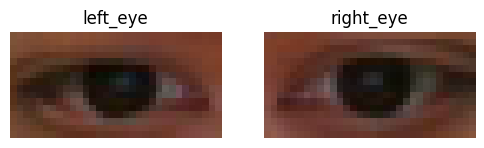

In [37]:
# Display the original image and the masked image together
fig, axes = plt.subplots(1, 2, figsize=(6, 6))
axes[0].imshow(left_eye)
axes[0].axis('off')
axes[0].set_title('left_eye')
axes[1].imshow(right_eye)
axes[1].axis('off')
axes[1].set_title('right_eye')
plt.show()

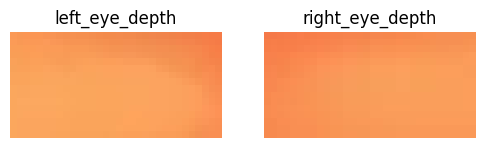

In [38]:
# Display the original image and the masked image together
fig, axes = plt.subplots(1, 2, figsize=(6, 6))
axes[0].imshow(left_eye_depth)
axes[0].axis('off')
axes[0].set_title('left_eye_depth')
axes[1].imshow(right_eye_depth)
axes[1].axis('off')
axes[1].set_title('right_eye_depth')
plt.show()

In [24]:
img_h, img_w = cropped_face_rgb.shape[:2]
mask = np.zeros((img_h, img_w), dtype=np.uint8)

In [25]:
RIGHT_IRIS = [474, 475, 476, 477]
LEFT_IRIS = [469, 470, 471, 472]

In [26]:
mesh_points = np.array(mesh_coordinates)
(l_cx, l_cy), l_radius = cv2.minEnclosingCircle(mesh_points[LEFT_IRIS])
(r_cx, r_cy), r_radius = cv2.minEnclosingCircle(mesh_points[RIGHT_IRIS])
center_left = np.array([l_cx, l_cy], dtype=np.int32)
center_right = np.array([r_cx, r_cy], dtype=np.int32)

In [28]:
# Extract mesh points for left and right irises
left_iris_points = mesh_points[LEFT_EYE].astype(np.int32)
right_iris_points = mesh_points[RIGHT_EYE].astype(np.int32)

# Draw polygons around the left and right irises using mesh points
outline_thickness = 1  # Set the desired thickness for the polygon outline

# Draw the polygon outline on the original image (cropped_face)
cv2.polylines(cropped_face, [left_iris_points], isClosed=True, color=(0, 0, 255), thickness=outline_thickness, lineType=cv2.LINE_AA)
cv2.polylines(cropped_face, [right_iris_points], isClosed=True, color=(0, 0, 255), thickness=outline_thickness, lineType=cv2.LINE_AA)

# Get the bounding boxes for cropping the irises based on the mesh points
l_x, l_y, l_w, l_h = cv2.boundingRect(left_iris_points)
r_x, r_y, r_w, r_h = cv2.boundingRect(right_iris_points)

ih, iw, _ = cropped_face.shape


# Add some padding around the bounding boxes
padding = 3
# Crop the left iris
y1, y2 = max(l_y-padding, 0), min(l_y + l_h+padding, ih)
x1, x2 = max(l_x-padding, 0), min(l_x + l_w+padding, iw)
cropped_left_iris = cropped_face[y1:y2, x1:x2]

# Crop the right iris
y1, y2 = max(r_y-padding, 0), min(r_y + r_h+padding, ih)
x1, x2 = max(r_x-padding, 0), min(r_x + r_w+padding, iw)
cropped_right_iris = cropped_face[y1:y2, x1:x2]

# Save the cropped images of both left and right irises
cv2.imwrite(f"{output_folder}/cropped_left_iris.png", cropped_left_iris)
cv2.imwrite(f"{output_folder}/cropped_right_iris.png", cropped_right_iris)

# Save the image with polygon outlines
cv2.imwrite(f"{output_folder}/eyes_with_polygon_outline.png", cropped_face)

True

In [ ]:
center_left, center_right

(array([88, 97], dtype=int32), array([151,  96], dtype=int32))

In [29]:
outline_thickness = 1
# Draw the circle outline on the original image (cropped_face)
cv2.circle(cropped_face, center_left, int(l_radius), (0, 0, 255), outline_thickness, cv2.LINE_AA)
cv2.circle(cropped_face, center_right, int(r_radius), (0, 0, 255), outline_thickness, cv2.LINE_AA)

ih, iw, _ = cropped_face.shape

# Crop the left iris
l_x, l_y, l_w, l_h = (
    int(l_cx - l_radius),
    int(l_cy - l_radius),
    int(2 * l_radius),
    int(2 * l_radius),
)
y1, y2 = max(l_y-3, 0), min(l_y + l_h+3, ih)
x1, x2 = max(l_x-3, 0), min(l_x + l_w+3, iw)
cropped_left_iris = cropped_face[y1:y2, x1:x2]

# Crop the right iris
r_x, r_y, r_w, r_h = (
    int(r_cx - r_radius),
    int(r_cy - r_radius),
    int(2 * r_radius),
    int(2 * r_radius),
)
y1, y2 = max(r_y-3, 0), min(r_y + r_h+3, ih)
x1, x2 = max(r_x-3, 0), min(r_x + r_w+3, iw)
cropped_right_iris = cropped_face[y1:y2, x1:x2]

# Save the cropped images of both left and right irises
cv2.imwrite(f"{output_folder}/cropped_left_iris.png", cropped_left_iris)
cv2.imwrite(f"{output_folder}/cropped_right_iris.png", cropped_right_iris)

# Save the image with circle outlines
cv2.imwrite(f"{output_folder}/eyes_with_circle_outline.png", cropped_face)

True

In [ ]:
cv2.circle(mask, center_left, int(l_radius), (255, 255, 255), -1, cv2.LINE_AA)
cv2.circle(mask, center_right, int(r_radius), (255, 255, 255), -1, cv2.LINE_AA)

ih, iw, _ = cropped_face.shape

# Crop the left iris
l_x, l_y, l_w, l_h = (
    int(l_cx - l_radius),
    int(l_cy - l_radius),
    int(2 * l_radius),
    int(2 * l_radius),
)
y1, y2 = max(l_y-3, 0), min(l_y + l_h+3, ih)
x1, x2 = max(l_x-3, 0), min(l_x + l_w+3, iw)
cropped_left_iris = cropped_face[y1:y2, x1:x2]
cropped_left_iris_mask = mask[y1:y2, x1:x2]

# Crop the right iris
r_x, r_y, r_w, r_h = (
    int(r_cx - r_radius),
    int(r_cy - r_radius),
    int(2 * r_radius),
    int(2 * r_radius),
)
y1, y2 = max(r_y-3, 0), min(r_y + r_h+3, ih)
x1, x2 = max(r_x-3, 0), min(r_x + r_w+3, iw)
cropped_right_iris = cropped_face[y1:y2, x1:x2]
cropped_right_iris_mask = mask[y1:y2, x1:x2]

# Save the cropped images of both left and right irises
cv2.imwrite(f"{output_folder}/cropped_left_iris.png", cropped_left_iris)
cv2.imwrite(f"{output_folder}/cropped_right_iris.png", cropped_right_iris)
cv2.imwrite(f"{output_folder}/eyes_mask.png", mask)

cv2.imwrite(f"{output_folder}/cropped_left_iris_mask.png", cropped_left_iris_mask)
cv2.imwrite(f"{output_folder}/cropped_right_iris_mask.png", cropped_right_iris_mask)

True

In [ ]:
right_iris_rgb = cv2.cvtColor(cropped_right_iris, cv2.COLOR_BGR2RGB)
right_iris_mask = cv2.cvtColor(cropped_right_iris_mask, cv2.COLOR_BGR2RGB)
left_iris_rgb = cv2.cvtColor(cropped_left_iris, cv2.COLOR_BGR2RGB)
left_iris_mask = cv2.cvtColor(cropped_left_iris_mask, cv2.COLOR_BGR2RGB)

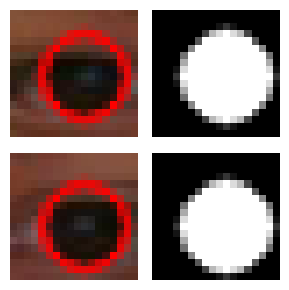

In [ ]:
# Create a figure with four subplots in a 2x2 layout
fig, axs = plt.subplots(2, 2, figsize=(3, 3))

# Display the images in the respective subplots
# Top-left subplot: right iris RGB
axs[0, 0].imshow(left_iris_rgb)
axs[0, 0].axis('off')  # Turn off axis

# Top-right subplot: right iris mask
axs[0, 1].imshow(left_iris_mask)
axs[0, 1].axis('off')  # Turn off axis

# Bottom-left subplot: left iris RGB
axs[1, 0].imshow(right_iris_rgb)
axs[1, 0].axis('off')  # Turn off axis

# Bottom-right subplot: left iris mask
axs[1, 1].imshow(right_iris_mask)
axs[1, 1].axis('off')  # Turn off axis

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

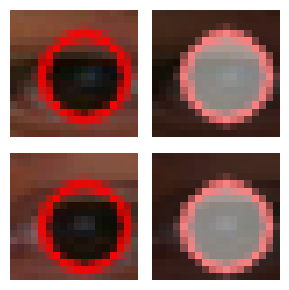

In [ ]:
# Create a figure with four subplots in a 2x2 layout
fig, axs = plt.subplots(2, 2, figsize=(3, 3))

# Display the images in the respective subplots

# Top-left subplot: right iris RGB
axs[0, 0].imshow(left_iris_rgb)
axs[0, 0].axis('off')  # Turn off axis

# Top-right subplot: right iris mask
axs[0, 1].imshow(left_iris_rgb)
axs[0, 1].imshow(left_iris_mask, alpha=0.5, cmap='hot')  # Overlay mask with transparency
axs[0, 1].axis('off')  # Turn off axis

# Bottom-left subplot: left iris RGB
axs[1, 0].imshow(right_iris_rgb)
axs[1, 0].axis('off')  # Turn off axis

# Bottom-right subplot: left iris mask
axs[1, 1].imshow(right_iris_rgb)
axs[1, 1].imshow(right_iris_mask, alpha=0.5, cmap='hot')  # Overlay mask with transparency
axs[1, 1].axis('off')  # Turn off axis

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

Almost there, but not correct yet. Still takes some area above the eye!!

Solution: RGB to gray scale -> binarize to get black iris & everything else as bg.

ref: https://docs.opencv.org/4.x/d7/d4d/tutorial_py_thresholding.html (Otsu's Binarization)

In [ ]:
# try_eye = "/home/vshah/Documents/Uni/Thesis_Cluster/pupil-size-estimation-with-super-resolution/data/EyeDentify/Wo_SR/GFPGAN_x2/left_eye/7/1/frame_01.png.png"
# left_iris_rgb = cv2.imread(try_eye)

In [ ]:
# Convert RGB image to grayscale
left_iris_gray = cv2.cvtColor(left_iris_rgb, cv2.COLOR_RGB2GRAY)

# Apply Gaussian blur for denoising
left_iris_blur = cv2.GaussianBlur(left_iris_gray, (5, 5), 0)

# Perform adaptive thresholding
_, left_iris_mask = cv2.threshold(left_iris_blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Invert the mask
inverted_mask = cv2.bitwise_not(left_iris_mask)

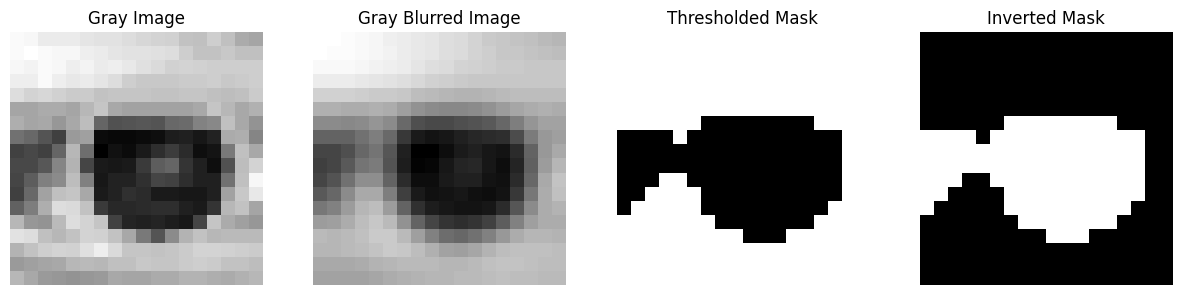

In [ ]:
# Plotting
fig, axes = plt.subplots(1, 4, figsize=(15, 5))

# Plot gray image
axes[0].imshow(left_iris_gray, cmap='gray')
axes[0].set_title('Gray Image')
axes[0].axis('off')

# Plot gray blurred image
axes[1].imshow(left_iris_blur, cmap='gray')
axes[1].set_title('Gray Blurred Image')
axes[1].axis('off')

# Plot thresholded mask
axes[2].imshow(left_iris_mask, cmap='gray')
axes[2].set_title('Thresholded Mask')
axes[2].axis('off')

# Plot inverted mask
axes[3].imshow(inverted_mask, cmap='gray')
axes[3].set_title('Inverted Mask')
axes[3].axis('off')

plt.show()

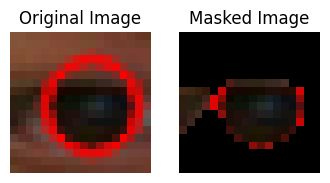

In [ ]:
inverted_mask_rgb = cv2.cvtColor(inverted_mask, cv2.COLOR_GRAY2RGB)

# Apply the inverted mask to the original image
masked_image = cv2.bitwise_and(left_iris_rgb, inverted_mask_rgb)

# Display the original image and the masked image together
fig, axes = plt.subplots(1, 2, figsize=(4, 4))
axes[0].imshow(left_iris_rgb)
axes[0].axis('off')
axes[0].set_title('Original Image')
axes[1].imshow(masked_image)
axes[1].axis('off')
axes[1].set_title('Masked Image')
plt.show()

In [ ]:
cv2.imwrite(f"{output_folder}/left_iris_segmented_mask.png", inverted_mask)
cv2.imwrite(f"{output_folder}/left_iris_segmented.png", masked_image)

True